In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [2]:
# loading datasets
actives = pd.read_csv('../../mold2_descriptors/2100_actives.csv')
inactives = pd.read_csv('../../mold2_descriptors/2100_inactives.csv')

In [3]:
print('actives:', len(actives))
print('inactives:', len(inactives))

actives: 1165
inactives: 291883


In [4]:
# spliting datasets into test - train & validation
actives_test = actives.sample(n=400, random_state=42)
actives_train = actives.drop(actives_test.index)
inactives_test = inactives.sample(n=400, random_state=42)
inactives_train = inactives.drop(inactives_test.index)

# balancing datasets by sampling just 415 inactives for training
inactives_train = inactives_train.sample(n=765, random_state=42)

In [5]:
df = pd.concat([actives_train, inactives_train], ignore_index=True)

In [6]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,1,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,4.90700,-0.261000,0.250000,1.812000,1
1,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.70000,0.546000,0.316000,1.274000,1
2,1,0,0,1,2,0,0,0,0,0,...,0,0,1,0,0,5.32200,-0.703000,0.182000,1.241000,1
3,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.75489,-0.193044,0.272727,0.599722,0
4,2,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,4.85800,0.349000,0.571000,2.725000,1


In [7]:
X = df.drop(['activity'], axis=1)
y = df['activity']

In [8]:
y.value_counts()

1    765
0    765
Name: activity, dtype: int64

In [9]:
import matplotlib.pyplot as plt

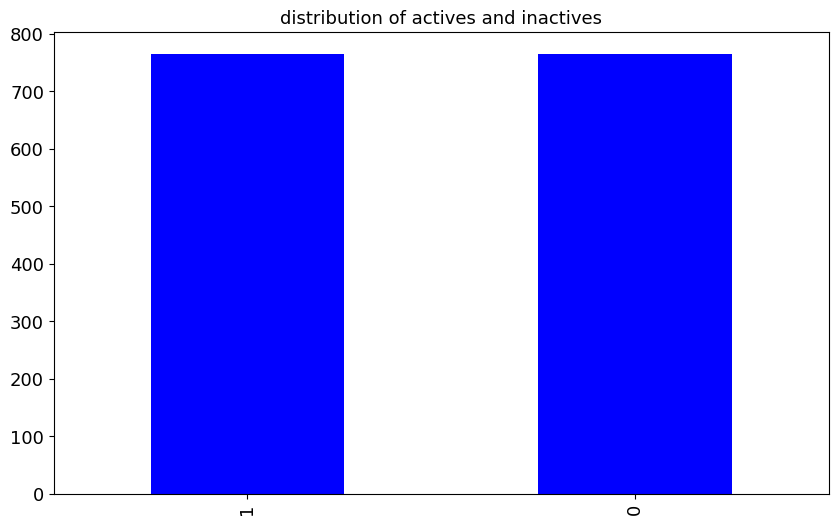

In [10]:
ax = y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='blue')
ax.set_title('distribution of actives and inactives', fontsize=13)
ax.set_alpha(0.5)

In [11]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# normalizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_validate)

## training model with balanced (by undersampling inactives) data

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=50, batch_size=32)

Epoch 1/50
34/34 [==============================] - 2s 18ms/step - loss: 0.6572 - accuracy: 0.6200 - val_loss: 0.5685 - val_accuracy: 0.7102
Epoch 2/50
34/34 [==============================] - 0s 7ms/step - loss: 0.4710 - accuracy: 0.7824 - val_loss: 0.4837 - val_accuracy: 0.7778
Epoch 3/50
34/34 [==============================] - 0s 8ms/step - loss: 0.3462 - accuracy: 0.8487 - val_loss: 0.5558 - val_accuracy: 0.7516
Epoch 4/50
34/34 [==============================] - 0s 8ms/step - loss: 0.3024 - accuracy: 0.8665 - val_loss: 0.5008 - val_accuracy: 0.8214
Epoch 5/50
34/34 [==============================] - 0s 8ms/step - loss: 0.1901 - accuracy: 0.9281 - val_loss: 0.5705 - val_accuracy: 0.8214
Epoch 6/50
34/34 [==============================] - 0s 7ms/step - loss: 0.1425 - accuracy: 0.9421 - val_loss: 0.6747 - val_accuracy: 0.7974
Epoch 7/50
34/34 [==============================] - 0s 8ms/step - loss: 0.1740 - accuracy: 0.9356 - val_loss: 0.7104 - val_accuracy: 0.7778
Epoch 8/50
34/34 [=

### evaluating the model using the test data

In [15]:
# getting the test dataset
testing_data = pd.concat([actives_test, inactives_test], ignore_index=True)

In [16]:
len(testing_data)

800

In [17]:
testing_data['activity'].value_counts()

1    400
0    400
Name: activity, dtype: int64

In [18]:
testing_data.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,1,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,5.087,0.343,0.240,0.314,1
1,0,0,0,0,3,0,0,0,0,0,...,0,1,0,0,0,5.087,-0.684,0.000,1.682,1
2,2,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,5.129,0.301,0.462,2.812,1
3,1,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,5.129,-0.323,0.231,1.792,1
4,2,0,0,0,3,0,0,0,0,0,...,0,0,1,0,0,5.000,-0.323,0.480,2.594,1


In [19]:
testing_data_x = testing_data.drop(['activity'], axis=1)
print(len(testing_data_x))
testing_data_x = scaler.transform(testing_data_x)
testing_data_y = testing_data['activity']

800


In [20]:
model.evaluate(testing_data_x, testing_data_y, verbose=2)

25/25 - 0s - loss: 1.5253 - accuracy: 0.8112 - 104ms/epoch - 4ms/step


[1.5252673625946045, 0.8112499713897705]

### evaluating model's performance with F1 score, precision, recall, etc

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [22]:
inactives_test_x = inactives_test.drop(['activity'], axis=1)
inactives_test_x = scaler.transform(inactives_test_x)
actives_test_x = actives_test.drop(['activity'], axis=1)
actives_test_x = scaler.transform(actives_test_x)

In [23]:
y_true_actives = np.array([1] * len(actives_test_x))
y_true_inactives = np.array([0] * len(inactives_test_x))
y_true = np.concatenate((y_true_actives, y_true_inactives))

There are both y_pred and y_pred_rounded because the model outputs a probability and we need to round it to get the class.


y_pred will be used to calculate the ROC curve and the AUC.


y_pred_rounded will be used to calculate the confusion matrix.

In [24]:
y_pred_actives = model.predict(actives_test_x)
y_pred_actives_rounded = (y_pred_actives > 0.5).astype(int).reshape(len(y_pred_actives, ))
y_pred_inactives = model.predict(inactives_test_x)
y_pred_inactives_rounded = (y_pred_inactives > 0.5).astype(int).reshape(len(y_pred_inactives, ))
y_pred = np.concatenate((y_pred_actives, y_pred_inactives))
y_pred_rounded = np.concatenate((y_pred_actives_rounded, y_pred_inactives_rounded))

13/13 [==============================] - 0s 2ms/step


In [25]:
accuracy = accuracy_score(y_true, y_pred_rounded)
precision = precision_score(y_true, y_pred_rounded)
recall = recall_score(y_true, y_pred_rounded)
f1 = f1_score(y_true, y_pred_rounded)
mcc = matthews_corrcoef(y_true, y_pred_rounded)

In [26]:
print("accuracy is {}".format(accuracy))
print("precision is {}".format(precision))
print("recall is {}".format(recall))
print("f1 is {}".format(f1))
print("mcc is {}".format(mcc))

accuracy is 0.81125
precision is 0.8120300751879699
recall is 0.81
f1 is 0.8110137672090113
mcc is 0.6225019453216187


Drawing the ROC curve to enable us to carry out threshold moving,

In [27]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)

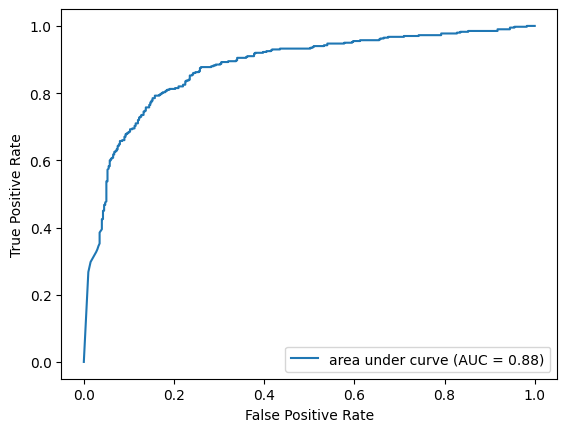

In [28]:
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='area under curve')
display.plot()
plt.show()

In [29]:
fav_thresholds = []
for i in range(len(thresholds)):
    if fpr[i] < 0.25 and tpr[i] > 0.8:
        fav_thresholds.append((i, thresholds[i], fpr[i], tpr[i]))

In [30]:
for i in fav_thresholds:
    print(i)

(106, 0.6780946, 0.175, 0.8025)
(107, 0.6285383, 0.18, 0.8025)
(108, 0.60403275, 0.18, 0.805)
(109, 0.601134, 0.1825, 0.805)
(110, 0.586797, 0.1825, 0.8075)
(111, 0.56716394, 0.185, 0.8075)
(112, 0.554168, 0.185, 0.81)
(113, 0.45389053, 0.19, 0.81)
(114, 0.45135638, 0.19, 0.8125)
(115, 0.34112573, 0.2025, 0.8125)
(116, 0.33905756, 0.2025, 0.815)
(117, 0.31362838, 0.21, 0.815)
(118, 0.24854894, 0.21, 0.82)
(119, 0.20208564, 0.22, 0.82)
(120, 0.17715499, 0.22, 0.825)
(121, 0.16629057, 0.225, 0.825)
(122, 0.13929275, 0.225, 0.835)
(123, 0.13820453, 0.2275, 0.835)
(124, 0.13212703, 0.2275, 0.8375)
(125, 0.11306704, 0.2325, 0.8375)
(126, 0.11286078, 0.2325, 0.84)
(127, 0.11102846, 0.235, 0.84)
(128, 0.08670358, 0.235, 0.8525)
(129, 0.07448842, 0.24, 0.8525)
(130, 0.073544644, 0.24, 0.855)
(131, 0.067122735, 0.2425, 0.855)
(132, 0.063360594, 0.2425, 0.86)
(133, 0.059839576, 0.2475, 0.86)
(134, 0.05526133, 0.2475, 0.8625)


In [31]:
selected_threshold = fav_thresholds[-1][1]
selected_threshold

0.05526133

In [32]:
y_pred_actives_rounded2 = (y_pred_actives > selected_threshold).astype(int).reshape(len(y_pred_actives, ))
y_pred_inactives_rounded2 = (y_pred_inactives > selected_threshold).astype(int).reshape(len(y_pred_inactives, ))
y_pred_rounded2 = np.concatenate((y_pred_actives_rounded2, y_pred_inactives_rounded2))

In [33]:
accuracy = accuracy_score(y_true, y_pred_rounded2)
precision = precision_score(y_true, y_pred_rounded2)
recall = recall_score(y_true, y_pred_rounded2)
f1 = f1_score(y_true, y_pred_rounded2)
mcc = matthews_corrcoef(y_true, y_pred_rounded2)

In [34]:
print("accuracy is {}".format(accuracy))
print("precision is {}".format(precision))
print("recall is {}".format(recall))
print("f1 is {}".format(f1))
print("mcc is {}".format(mcc))

accuracy is 0.80625
precision is 0.7765237020316027
recall is 0.86
f1 is 0.8161328588374852
mcc is 0.6160700740352575
